## Counterfactual Predictions with Ensemble Learning

We implement a counterfactual generator that trains a model and a test dataset and generates counterfactuals for each test sample. The model is based on ensemble learning using a library AutoGluon. We use climate data from California in 2020 for input data.


In [16]:
import os
import numpy as np
import pandas as pd
from pytorch_lightning import seed_everything
from autogluon.tabular import TabularDataset, TabularPredictor

In [21]:
df = pd.read_csv('data/demo/climate_exposure_ca_2020.csv')

In [23]:
treatment = 'avg_smoke_pm_jul'
outcome = 'EP_MINRTY'

In [25]:
df = df[df[treatment].notna()]
# remove nans from training data
dftrain = df[~np.isnan(df[outcome])]
train_data = TabularDataset(dftrain)

In [26]:
# === Model fitting ===
trainer = TabularPredictor(label=outcome)
predictor = trainer.fit(
    train_data
)
results = predictor.fit_summary()
mu = predictor.predict(df)
mu.name = mu.name + "_pred"

No path specified. Models will be saved in: "AutogluonModels/ag-20230902_152810/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230902_152810/"
AutoGluon Version:  0.8.2
Python Version:     3.9.12
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 21.4.0: Mon Feb 21 20:35:58 PST 2022; root:xnu-8020.101.4~2/RELEASE_ARM64_T6000
Disk Space Avail:   213.59 GB / 994.66 GB (21.5%)
Train Data Rows:    8616
Train Data Columns: 31
Label Column: EP_MINRTY
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (100.0, 0.0, 61.83482, 25.71617)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to pre

[1000]	valid_set's rmse: 9.47886
[2000]	valid_set's rmse: 9.37614
[3000]	valid_set's rmse: 9.3776


	-9.3728	 = Validation score   (-root_mean_squared_error)
	14.77s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: LightGBM ...
	-9.5063	 = Validation score   (-root_mean_squared_error)
	3.93s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-11.2894	 = Validation score   (-root_mean_squared_error)
	4.8s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: CatBoost ...
	-9.1437	 = Validation score   (-root_mean_squared_error)
	25.16s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-11.4142	 = Validation score   (-root_mean_squared_error)
	1.06s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
		No module named 'torch.mps'
Fitting model: XGBoost ...
	-9.5644	 = Validation score   (-root_mean_squared_error)
	15.99s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetTorch ...
		No module named 'torch.mps'
Fitting model: Light

[1000]	valid_set's rmse: 9.72927


	-9.7241	 = Validation score   (-root_mean_squared_error)
	31.01s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-8.9674	 = Validation score   (-root_mean_squared_error)
	0.09s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 98.51s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230902_152810/")


*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2  -8.967410       0.139963  90.961618                0.000194           0.091171            2       True         10
1             CatBoost  -9.143704       0.012315  25.163025                0.012315          25.163025            1       True          6
2           LightGBMXT  -9.372777       0.033465  14.773071                0.033465          14.773071            1       True          3
3             LightGBM  -9.506263       0.008842   3.928576                0.008842           3.928576            1       True          4
4              XGBoost  -9.564376       0.019053  15.988653                0.019053          15.988653            1       True          8
5        LightGBMLarge  -9.724107       0.047623  31.010039                0.047623          31.010039        

/Users/ant746/PycharmProjects/kate/env/lib/python3.9/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [29]:
treat_trainer = TabularPredictor(label=treatment)
treat_train_data = TabularDataset(
    dftrain[dftrain.columns.difference([outcome])]
)
treat_predictor = treat_trainer.fit(treat_train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20230902_153110/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230902_153110/"
AutoGluon Version:  0.8.2
Python Version:     3.9.12
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 21.4.0: Mon Feb 21 20:35:58 PST 2022; root:xnu-8020.101.4~2/RELEASE_ARM64_T6000
Disk Space Avail:   212.01 GB / 994.66 GB (21.3%)
Train Data Rows:    8616
Train Data Columns: 30
Label Column: avg_smoke_pm_jul
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (13.466997904162248, 0.0, 0.1968, 0.43993)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature 

[1000]	valid_set's rmse: 0.257681
[2000]	valid_set's rmse: 0.254583
[3000]	valid_set's rmse: 0.254169
[4000]	valid_set's rmse: 0.253772
[5000]	valid_set's rmse: 0.253633
[6000]	valid_set's rmse: 0.253485
[7000]	valid_set's rmse: 0.2534
[8000]	valid_set's rmse: 0.25336
[9000]	valid_set's rmse: 0.253326
[10000]	valid_set's rmse: 0.253302


	-0.2533	 = Validation score   (-root_mean_squared_error)
	41.84s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.265053
[2000]	valid_set's rmse: 0.262371
[3000]	valid_set's rmse: 0.262194


	-0.262	 = Validation score   (-root_mean_squared_error)
	13.75s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.3197	 = Validation score   (-root_mean_squared_error)
	5.91s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: CatBoost ...
	-0.2207	 = Validation score   (-root_mean_squared_error)
	36.5s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.2729	 = Validation score   (-root_mean_squared_error)
	0.81s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
		No module named 'torch.mps'
Fitting model: XGBoost ...
	-0.2996	 = Validation score   (-root_mean_squared_error)
	7.93s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
		No module named 'torch.mps'
Fitting model: LightGBMLarge ...
	-0.2628	 = Validation score   (-root_mean_squared_error)
	7.23s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: Weig

In [36]:
# === Counterfactual generation ===
A = df[treatment]
amin, amax = np.nanmin(A), np.nanmax(A)
n_bins = 300 # len(np.unique(A))
avals = np.linspace(amin, amax, n_bins)

mu_cf = []
for a in avals:
    cfdata = df.copy()
    cfdata[treatment] = a
    cfdata = TabularDataset(cfdata)
    predicted = predictor.predict(cfdata)
    mu_cf.append(predicted)
mu_cf = pd.concat(mu_cf, axis=1)

Text(0.5, 1.0, 'Counterfactuals')

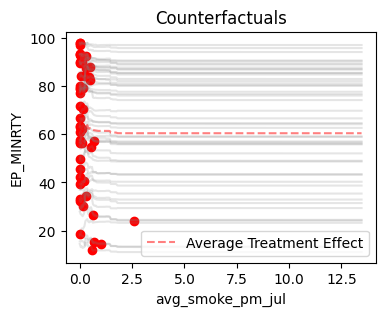

In [39]:
ix = np.random.choice(len(df), 50)
cfpred_sample = mu_cf.iloc[ix].values
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(avals, cfpred_sample.T, color="gray", alpha=0.2)
ax.scatter(A.iloc[ix], mu.iloc[ix], color="red")

# Draw a line for the ATE
ax.plot(
    avals,
    mu_cf.mean(),
    color="red",
    linestyle="--",
    label="Average Treatment Effect",
    alpha=0.5,
)
ax.legend()

ax.set_xlabel(treatment)
ax.set_ylabel(outcome)
ax.set_title("Counterfactuals")